
# Author : Orkun Orulluoglu 




# UCB so we'll look at the first REINFORCED ALGORITHM 

--known as the upper confidence class

-- the interval between them that will not cause problems is called a segment, this trust 

--there is a distribution behind the algorithm that we know or don't know 

Let's see what the --logic is now 

:the user takes one action at a time (event-e)

:returns a score for this action (e.g. web click 1; no click 0)

:the goal is to maximize clicks!!!

# we have advertising data 

--user clicks on some of these and not others 

--our job is to invest in the most clicked ads from the ads that the user clicks on. 

--think of it as a time series, predicting future clicks based on past ones!!!

-- we have a file that shows the ads that the user clicked on 

Let's first understand --random selection: 

: this does not make any intelligent selection, it randomly selects postings 

: if we make a choice that the user can click and the user chooses it, we get 1 reward, but if the opposite happens, we get no reward !!!

: we try to increase this reward amount with ucb !!!

: we will try with random selection and ucb and try to reach the max reward !!!

# let's code random selection 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
veriler = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
veriler

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
# import random 

N = 10000 
d = 10
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = veriler.values[n,ad] # reward = 1 if nth row = 1
    toplam = toplam+odul 

In [5]:
toplam

1264

In [6]:
secilenler # compare it with the veirs we have and we'll see if we got the prize !!!

[0,
 0,
 3,
 5,
 8,
 7,
 0,
 6,
 3,
 1,
 1,
 8,
 3,
 5,
 0,
 7,
 5,
 2,
 4,
 4,
 9,
 6,
 8,
 4,
 2,
 0,
 5,
 9,
 0,
 5,
 5,
 2,
 7,
 2,
 7,
 4,
 4,
 6,
 4,
 9,
 6,
 1,
 4,
 3,
 0,
 5,
 8,
 1,
 1,
 9,
 5,
 6,
 0,
 9,
 9,
 1,
 4,
 1,
 7,
 9,
 5,
 4,
 6,
 4,
 9,
 1,
 5,
 7,
 1,
 4,
 1,
 9,
 0,
 9,
 3,
 6,
 7,
 0,
 5,
 3,
 8,
 8,
 1,
 4,
 0,
 3,
 8,
 2,
 6,
 4,
 1,
 5,
 3,
 4,
 8,
 7,
 6,
 7,
 6,
 7,
 3,
 7,
 5,
 2,
 6,
 8,
 9,
 8,
 4,
 1,
 2,
 1,
 3,
 0,
 2,
 8,
 0,
 3,
 7,
 7,
 6,
 8,
 6,
 0,
 8,
 2,
 3,
 2,
 4,
 4,
 0,
 2,
 7,
 7,
 6,
 6,
 2,
 1,
 9,
 9,
 0,
 0,
 2,
 7,
 5,
 2,
 5,
 4,
 3,
 9,
 0,
 7,
 5,
 8,
 7,
 0,
 7,
 7,
 4,
 2,
 7,
 5,
 6,
 7,
 3,
 0,
 1,
 8,
 8,
 8,
 3,
 5,
 1,
 5,
 7,
 1,
 8,
 0,
 9,
 0,
 5,
 8,
 6,
 3,
 4,
 9,
 6,
 6,
 7,
 2,
 6,
 7,
 5,
 2,
 3,
 9,
 4,
 9,
 8,
 1,
 0,
 7,
 9,
 9,
 5,
 6,
 3,
 7,
 8,
 7,
 8,
 7,
 6,
 3,
 5,
 3,
 2,
 8,
 4,
 1,
 9,
 1,
 7,
 6,
 1,
 3,
 0,
 3,
 5,
 5,
 8,
 1,
 4,
 7,
 0,
 8,
 2,
 4,
 3,
 1,
 5,
 2,
 2,
 7,
 6,
 7,
 8,
 9,
 4,
 0,


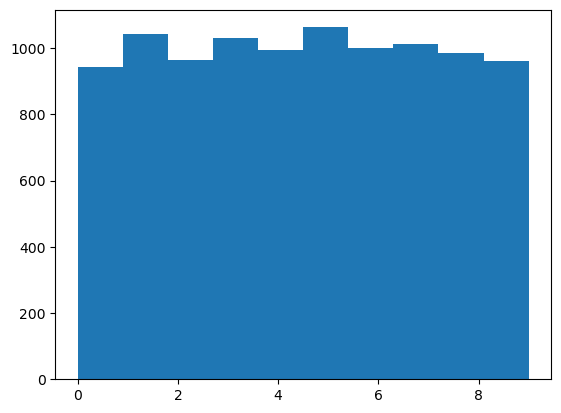

In [7]:
plt.hist(secilenler)
plt.show()